# Conflicts time-series dataset released by ACLED

Link to Conflicts data released by ACLED: https://www.acleddata.com/data/

For more details about the data: https://www.acleddata.com/resources/general-guides/

In [1]:
from IPython.display import HTML as html

html('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [6]:
from plotly_dataframe import plot
from plot_map import draw_admin
import pandas as pd
import numpy as np
import ntpath
import glob
# Set a value to column width in order to not view dataframe too bulky.
pd.options.display.max_colwidth = 20

In [2]:
# Define the path where the results arising from this analysis will be saved.
path_to_save_data = "./time-series/"

# Day granularity data - YEM, NGA, SYR, BFA

The conflict data of four countries have been downloaded: *Yemen* (YEM), *Nigeria* (NGA), *Syria* (SYR) and *Burkina Faso* (BFA). These countries have been chosen according to the data of the FCS & rCSI indicators.

In [3]:
# Read the data released by ACLED regarding the conflicts indicator.
path = "./wfp_data/"
all_files = glob.glob(path + "*.csv")

dfs = []

for filename in all_files:
    df = pd.read_csv(filename)
    df["Country"] = ntpath.basename(filename).split(".")[0]
    dfs.append(df)

df = pd.concat(dfs, axis = 0, ignore_index = True)
print("The data released by ACLED:")
df.head()

The data released by ACLED:


,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,Country
0,6982420,854,BFO3548,3548,07 March 2020,2020,1,Protests,Peaceful protest,Protesters (Burk...,...,13.3258,-1.5347,1,MinuteBf,New media,"On 7 March 2020,...",0,1583789987,BFA,Burkina Faso
1,6982210,854,BFO3552,3552,07 March 2020,2020,1,Protests,Peaceful protest,Protesters (Burk...,...,12.2494,-0.6153,1,AIB (Burkina Faso),National,"On 7 March 2020,...",0,1583789987,BFA,Burkina Faso
2,6982248,854,BFO3543,3543,07 March 2020,2020,1,Protests,Peaceful protest,Protesters (Burk...,...,10.3300,-3.1800,1,Bafuji Infos,Subnational,"On 7 March 2020,...",0,1583789987,BFA,Burkina Faso
3,6982260,854,BFO3545,3545,07 March 2020,2020,1,Protests,Peaceful protest,Protesters (Burk...,...,11.4909,-3.5217,1,Burkina24,National,"On 7 March 2020,...",0,1583789987,BFA,Burkina Faso
4,6982305,854,BFO3550,3550,07 March 2020,2020,1,Protests,Peaceful protest,Protesters (Burk...,...,13.5828,-2.4216,1,Faso Nord,Subnational,"On 7 March 2020,...",0,1583789987,BFA,Burkina Faso


### Brief items description

- *data_id*: an individual date numeric	identifier.
- *iso*: a numeric code	for	each individual	country.
- *event_id_cnty*: an individual identifier	by number and country acronym (updated annually).
- *event_id_no_cnty*: an individual	numeric	identifier (updated	annually).
- *event_date*: the	day, month and year	on which an	event took place.
- *year*: the year in which	an event took place.
- *time_precision*: a numeric code indicating the level	of certainty of	the	date coded for the event.
- *event_type*: the	type of	event.
- *sub_event_type*: the	type of	sub-event.
- *actor1*: the	named actor	involved in	the	event.
- *assoc_actor_1*: the named actor associated with or identifying actor1.
- *inter1*: a numeric code indicating the type of actor1.
- *actor2*: the	named actor	involved in	the	event.
- *assoc_actor_2*: the named actor associated with or identifying actor2.
- *inter2*: a numeric code indicating the type of actor2.
- *interaction*: a numeric code	indicating the interaction between types of	actor1 and actor2.
- *region*: the	region of the world	where the event	took place.
- *country*: the country in	which the event	took place.
- *admin1*: the	largest	sub-national administrative	region in which	the	event took place.
- *admin2*: the	second largest sub-national	administrative region in which the event took place.
- *admin3*: the	third largest sub-national administrative region in	which the event	too place.
- *location*: the location in which	the	event took place.
- *latitude*: the latitude of the location.
- *longitude*: the longitude of	the	location.
- *geo_precision*: a numeric code indicating the level of certainty	of the location coded for the event.
- *source*: the	source of the event	report.
- *source scale*: the scale	(local,	regional, national,	international) of the source.
- *notes*: a short description of the event.
- *fatalities*: the	number of reported fatalities which	occurred during	the	event.

ACLED currently	codes six types	of events, both	violent	and	non-violent, that may occur during a conflict. These include:
- *Battles*: violent interactions between two organised armed groups;
- *Explosions/Remote violence*: one-sided violence events in which the tool for	engaging in	conflict creates asymmetry by taking away the ability of the target	to respond;
- *Violence against civilians*: violent	events where an	organised armed	group deliberately inflicts	violence upon unarmed non-combatants;
- *Protests*: a public demonstration against a political entity, government	institution, policy	or group in	which the participants are not violent;
- *Riots*: violent events where	demonstrators or mobs engage in	disruptive acts	or disorganised	acts of	violence against property or people;
- *Strategic development*: accounts	for often non-violent activity by conflict and other agents	within the context of the war/dispute. Recruitment,	looting	and	arrests	are	included.

In [4]:
# Keep only some features/items and raname them.
df = df[["Country", "event_date", "event_type", "sub_event_type", "admin1", "fatalities"]]
df.rename(columns = {"event_date": "Datetime", "event_type": "Event type", "sub_event_type": "Subevent type", "admin1": "AdminStrata", "fatalities": "Fatalities"}, inplace = True)
df.head()

,Country,Datetime,Event type,Subevent type,AdminStrata,Fatalities
0,Burkina Faso,07 March 2020,Protests,Peaceful protest,Centre-Nord,0
1,Burkina Faso,07 March 2020,Protests,Peaceful protest,Plateau-Central,0
2,Burkina Faso,07 March 2020,Protests,Peaceful protest,Sud-Ouest,0
3,Burkina Faso,07 March 2020,Protests,Peaceful protest,Hauts-Bassins,0
4,Burkina Faso,07 March 2020,Protests,Peaceful protest,Nord,0


In [5]:
print("The countries are:", ", ".join(df.Country.unique()))

The countries are: Burkina Faso, Nigeria, Syria, Yemen


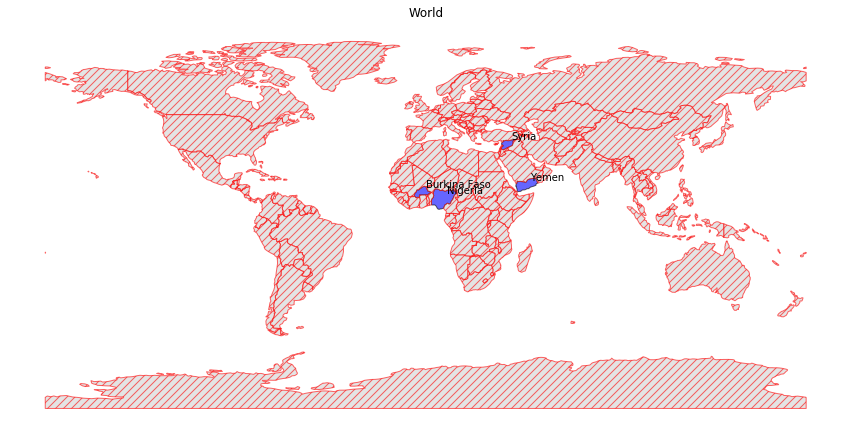

In [7]:
draw_admin("World", df.Country.unique(), figsize = (15, 9), annotation = True, annotation_selected = True)

### Preprocessing

In [8]:
# Rename the name of some AdminStrata according to the fcs and rcsi names of the AdminStrata.
df.replace(["Lahij", "Sanaa", "Sadah", "Hadramawt", "Al Mahrah", "Suqutra", "Ad Dali", "Amanat al Asimah"], 
           ["Lahj", "Sana'a", "Sa'ada", "Hadramaut", "Al Maharah", "Socotra", "Al Dhale'e", "Amanat Al Asimah"], inplace = True)
df.replace(["Boucle du Mouhoun"], ["Boucle-Du-Mouhoun"], inplace = True)

In [9]:
AdminStratas = df.groupby("Country")["AdminStrata"].unique()

- **Yemen**: the administrative division of Yemen is divided into two main divisions (governorates and districts). There are 22 governorates, including the capital Sana'a (Amanat Al Asimah) and Socotra Archipelago. The Conflicts dataframe has the values of all the governorates.

In [8]:
print(AdminStratas["Yemen"].shape)
AdminStratas["Yemen"]

(22,)


array(["Al Dhale'e", 'Aden', 'Al Hudaydah', 'Al Jawf', 'Hajjah', 'Marib',
       "Sa'ada", 'Abyan', 'Al Bayda', 'Shabwah', 'Amran', 'Hadramaut',
       'Socotra', 'Lahj', 'Taizz', 'Amanat Al Asimah', "Sana'a", 'Dhamar',
       'Al Mahwit', 'Al Maharah', 'Ibb', 'Raymah'], dtype=object)

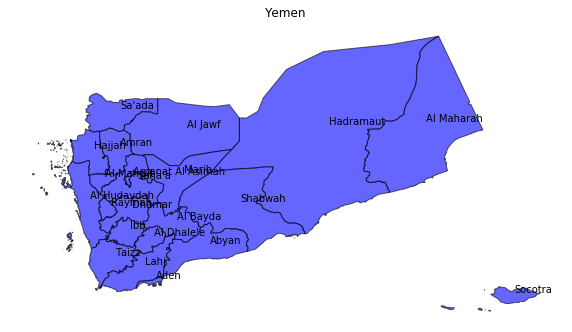

In [10]:
draw_admin("Yemen", AdminStratas["Yemen"], figsize = (10, 7), annotation = True)

- **Nigeria**: Nigeria is divided into 36 states. It also includes *The Federal Capital Territory* that is not a state and it is under the direct control of the federal government. The Conflicts dataframe has the values of all 37 governatores.

In [11]:
print(AdminStratas["Nigeria"].shape)
AdminStratas["Nigeria"]

(37,)


array(['Plateau', 'Edo', 'Bayelsa', 'Ekiti', 'Zamfara', 'Borno',
       'Adamawa', 'Yobe', 'Kano', 'Delta', 'Imo', 'Cross River',
       'Akwa Ibom', 'Osun', 'Kaduna', 'Benue',
       'Federal Capital Territory', 'Lagos', 'Bauchi', 'Niger', 'Ogun',
       'Oyo', 'Katsina', 'Sokoto', 'Abia', 'Anambra', 'Rivers', 'Kwara',
       'Enugu', 'Ebonyi', 'Jigawa', 'Kogi', 'Ondo', 'Nasarawa', 'Gombe',
       'Taraba', 'Kebbi'], dtype=object)

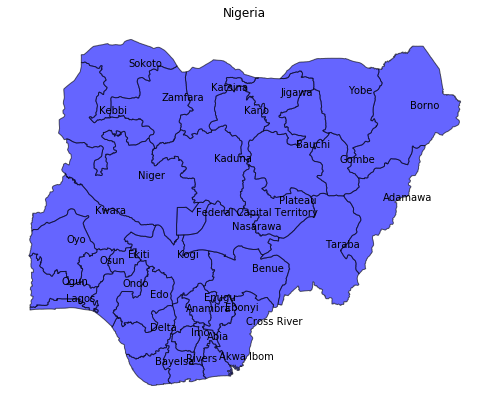

In [12]:
draw_admin("Nigeria", AdminStratas["Nigeria"], figsize = (10, 7), annotation = True)

- **Syria**: the governatores of the Syria country are 14. The Conflicts dataframe has the values of all 14 governatores.

In [13]:
print(AdminStratas["Syria"].shape)
AdminStratas["Syria"]

(14,)


array(['Idleb', 'Rural Damascus', 'Deir-ez-Zor', 'Hama', 'Ar-Raqqa',
       'As-Sweida', "Dar'a", 'Aleppo', 'Lattakia', 'Al-Hasakeh',
       'Quneitra', 'Homs', 'Damascus', 'Tartous'], dtype=object)

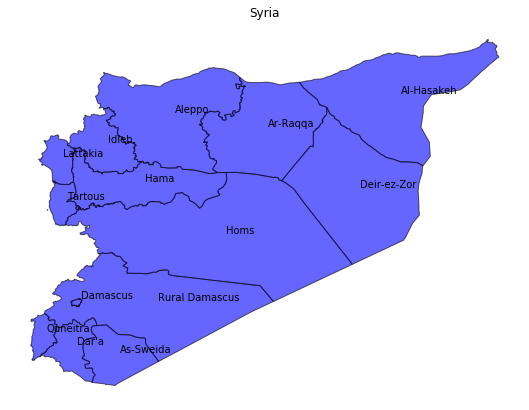

In [14]:
draw_admin("Syria", AdminStratas["Syria"], figsize = (10, 7), annotation = True)

- **Burkina Faso**: Burkina Faso is divided into 13 administrative regions. The Conflicts dataframe has the values of all 13 regions.

In [15]:
print(AdminStratas["Burkina Faso"].shape)
AdminStratas["Burkina Faso"]

(13,)


array(['Centre-Nord', 'Plateau-Central', 'Sud-Ouest', 'Hauts-Bassins',
       'Nord', 'Cascades', 'Est', 'Centre', 'Sahel', 'Centre-Ouest',
       'Boucle-Du-Mouhoun', 'Centre-Sud', 'Centre-Est'], dtype=object)

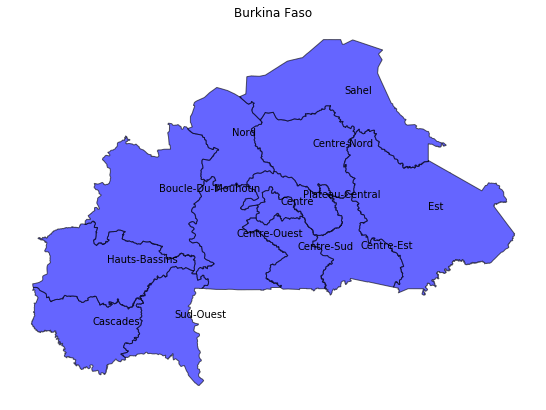

In [16]:
draw_admin("Burkina Faso", AdminStratas["Burkina Faso"], figsize = (10, 7), annotation = True)

In [12]:
# Convert to an appropriate datetime format.
df["Datetime"] = pd.to_datetime(df.Datetime)
df.sort_values("Datetime", ascending = True, inplace = True) 
df.reset_index(drop = True, inplace = True)
df.head()

,Country,Datetime,Event type,Subevent type,AdminStrata,Fatalities
0,Yemen,2015-01-01,Battles,Armed clash,Marib,9
1,Yemen,2015-01-01,Explosions/Remot...,Remote explosive...,Hadramaut,4
2,Yemen,2015-01-01,Battles,Armed clash,Al Bayda,0
3,Yemen,2015-01-01,Riots,Violent demonstr...,Aden,0
4,Yemen,2015-01-01,Strategic develo...,Disrupted weapon...,Al Dhale'e,0


In [13]:
# Check if the dataframe contains NaN values.
df.isnull().sum()

Country          0
Datetime         0
Event type       0
Subevent type    0
AdminStrata      0
Fatalities       0
dtype: int64

In [14]:
# Create appropriate time-series subgroups with an appropriate datetime object resampled to day. 
df = df.groupby(["Country", "AdminStrata", "Event type", "Subevent type"]).apply(lambda group: group.set_index("Datetime").resample("D").mean()).reset_index()
df.reset_index(drop = True, inplace = True)
df.head()

,Country,AdminStrata,Event type,Subevent type,Datetime,Fatalities
0,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2018-01-01,0.0
1,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2018-01-02,NaN
2,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2018-01-03,NaN
3,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2018-01-04,NaN
4,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2018-01-05,NaN


In [15]:
# Create a dataframe with multindex column in order to have a summary dataframe of the time-series.
df = df.set_index(["Datetime", "Country", "AdminStrata", "Event type", "Subevent type"]).unstack(["Country", "AdminStrata", "Event type", "Subevent type"])
df.columns = df.columns.droplevel(0)
freq = "D"
df.index.freq = freq
df.head()

Country            Burkina Faso                                \
AdminStrata   Boucle-Du-Mouhoun                                 
Event type              Battles    Explosions/Remote violence   
Subevent type       Armed clash Remote explosive/landmine/IED   
Datetime                                                        
2015-01-01                  NaN                  NaN            
2015-01-02                  NaN                  NaN            
2015-01-03                  NaN                  NaN            
2015-01-04                  NaN                  NaN            
2015-01-05                  NaN                  NaN            

Country                                                            \
AdminStrata                                                         
Event type            Protests        Riots                         
Subevent type Peaceful protest Mob violence Violent demonstration   
Datetime                                                            
2015-01-01                 NaN          NaN                  NaN    
2015-01-02                 NaN          NaN                  NaN    
2015-01-03                 NaN          NaN                  NaN    
2015-01-04                 NaN          NaN                  NaN    
2015-01-05                 NaN          NaN                  NaN    

Country                                                            \
AdminStrata                                                         
Event type    Strategic developments                                
Subevent type  Disrupted weapons use Looting/property destruction   
Datetime                                                            
2015-01-01                     NaN                    NaN           
2015-01-02                     NaN                    NaN           
2015-01-03                     NaN                    NaN           
2015-01-04                     NaN                    NaN           
2015-01-05                     NaN                    NaN           

Country                                                          ...  \
AdminStrata                                            Cascades  ...   
Event type        Violence against civilians            Battles  ...   
Subevent type Abduction/forced disappearance Attack Armed clash  ...   
Datetime                                                         ...   
2015-01-01                     NaN              NaN         NaN  ...   
2015-01-02                     NaN              NaN         NaN  ...   
2015-01-03                     NaN              NaN         NaN  ...   
2015-01-04                     NaN              NaN         NaN  ...   
2015-01-05                     NaN              NaN         NaN  ...   

Country                        Yemen                           \
AdminStrata                    Taizz                            
Event type    Strategic developments                            
Subevent type                Arrests Change to group/activity   
Datetime                                                        
2015-01-01                     NaN                    NaN       
2015-01-02                     NaN                    NaN       
2015-01-03                     NaN                    NaN       
2015-01-04                     NaN                    NaN       
2015-01-05                     NaN                    NaN       

Country                                                               \
AdminStrata                                                            
Event type                                                             
Subevent type Disrupted weapons use Headquarters or base established   
Datetime                                                               
2015-01-01                     NaN                   NaN               
2015-01-02                     NaN                   NaN               
2015-01-03                     NaN                   NaN               
2015-01-04         

N.B. The NaN values must be fill with the value 0 (0 fatalities ascertained by the survey).

In [16]:
df.fillna(value = 0, inplace = True)
df.head()

Country            Burkina Faso                                \
AdminStrata   Boucle-Du-Mouhoun                                 
Event type              Battles    Explosions/Remote violence   
Subevent type       Armed clash Remote explosive/landmine/IED   
Datetime                                                        
2015-01-01                  0.0                  0.0            
2015-01-02                  0.0                  0.0            
2015-01-03                  0.0                  0.0            
2015-01-04                  0.0                  0.0            
2015-01-05                  0.0                  0.0            

Country                                                            \
AdminStrata                                                         
Event type            Protests        Riots                         
Subevent type Peaceful protest Mob violence Violent demonstration   
Datetime                                                            
2015-01-01                 0.0          0.0                  0.0    
2015-01-02                 0.0          0.0                  0.0    
2015-01-03                 0.0          0.0                  0.0    
2015-01-04                 0.0          0.0                  0.0    
2015-01-05                 0.0          0.0                  0.0    

Country                                                            \
AdminStrata                                                         
Event type    Strategic developments                                
Subevent type  Disrupted weapons use Looting/property destruction   
Datetime                                                            
2015-01-01                     0.0                    0.0           
2015-01-02                     0.0                    0.0           
2015-01-03                     0.0                    0.0           
2015-01-04                     0.0                    0.0           
2015-01-05                     0.0                    0.0           

Country                                                          ...  \
AdminStrata                                            Cascades  ...   
Event type        Violence against civilians            Battles  ...   
Subevent type Abduction/forced disappearance Attack Armed clash  ...   
Datetime                                                         ...   
2015-01-01                     0.0              0.0         0.0  ...   
2015-01-02                     0.0              0.0         0.0  ...   
2015-01-03                     0.0              0.0         0.0  ...   
2015-01-04                     0.0              0.0         0.0  ...   
2015-01-05                     0.0              0.0         0.0  ...   

Country                        Yemen                           \
AdminStrata                    Taizz                            
Event type    Strategic developments                            
Subevent type                Arrests Change to group/activity   
Datetime                                                        
2015-01-01                     0.0                    0.0       
2015-01-02                     0.0                    0.0       
2015-01-03                     0.0                    0.0       
2015-01-04                     0.0                    0.0       
2015-01-05                     0.0                    0.0       

Country                                                               \
AdminStrata                                                            
Event type                                                             
Subevent type Disrupted weapons use Headquarters or base established   
Datetime                                                               
2015-01-01                     0.0                   0.0               
2015-01-02                     0.0                   0.0               
2015-01-03                     0.0                   0.0               
2015-01-04         

In [17]:
plot(df, title = "Conflict - Daily - Subevent", style = "lines", yaxis = "Fatalities", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [18]:
# Now save the time-series of each country keeping as indeces the own first and last index.
def save(group, name):
    country = group.name
    group = group[country]
    # Adjust time-series group.
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    # Save.
    group.to_csv(path_to_save_data + country + "/" + name + ".csv", index_label = False)

In [19]:
# Save the dataframe.
_ = df.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_conflicts-daily-original"))

Reduce the Event tanking only the 'Event type' summing the corresponding 'Subevent type'.

In [20]:
# Reduce the Event tanking only the 'Event type' summing the corresponding 'Subevent type'.
df_event = df.groupby(level = [0, 1, 2], axis = 1).sum()
df_event.head()

Country          Burkina Faso                                            \
AdminStrata Boucle-Du-Mouhoun                                             
Event type            Battles Explosions/Remote violence Protests Riots   
Datetime                                                                  
2015-01-01                0.0                  0.0            0.0   0.0   
2015-01-02                0.0                  0.0            0.0   0.0   
2015-01-03                0.0                  0.0            0.0   0.0   
2015-01-04                0.0                  0.0            0.0   0.0   
2015-01-05                0.0                  0.0            0.0   0.0   

Country                                                                 \
AdminStrata                                                   Cascades   
Event type  Strategic developments Violence against civilians  Battles   
Datetime                                                                 
2015-01-01                   0.0                    0.0            0.0   
2015-01-02                   0.0                    0.0            0.0   
2015-01-03                   0.0                    0.0            0.0   
2015-01-04                   0.0                    0.0            0.0   
2015-01-05                   0.0                    0.0            0.0   

Country                                                ...  \
AdminStrata                                            ...   
Event type  Explosions/Remote violence Protests Riots  ...   
Datetime                                               ...   
2015-01-01                   0.0            0.0   0.0  ...   
2015-01-02                   0.0            0.0   0.0  ...   
2015-01-03                   0.0            0.0   0.0  ...   
2015-01-04                   0.0            0.0   0.0  ...   
2015-01-05                   0.0            0.0   0.0  ...   

Country                          Yemen                   \
AdminStrata                    Shabwah Socotra            
Event type  Violence against civilians Battles Protests   
Datetime                                                  
2015-01-01                   0.0           0.0      0.0   
2015-01-02                   0.0           0.0      0.0   
2015-01-03                   0.0           0.0      0.0   
2015-01-04                   1.0           0.0      0.0   
2015-01-05                   0.0           0.0      0.0   

Country                                                                \
AdminStrata                          Taizz                              
Event type  Strategic developments Battles Explosions/Remote violence   
Datetime                                                                
2015-01-01                   0.0       0.0                  0.0         
2015-01-02                   0.0       0.0                  0.0         
2015-01-03                   0.0       0.0                  0.0         
2015-01-04                   0.0       0.0                  0.0         
2015-01-05                   0.0       0.0                  0.0         

Country                                                                       
AdminStrata                                                                   
Event type  Protests Riots Strategic developments Violence against civilians  
Datetime                                                                      
2015-01-01       0.0   0.0                  0.0                    0.0        
2015-01-02       0.0   0.0                  0.0                    0.0        
2015-01-03       0.0   0.0                  0.0                    0.0        
2015-01-04       0.0   0.0                  0.0                    0.0        
2015-01-05       0.0   0.0                  0.0                    0.0        

[5 rows x 461 columns]

In [22]:
plot(df_event, title = "Conflict - Daily - Event", style = "lines", yaxis = "Fatalities", 
     first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [23]:
# Save the dataframe.
_ = df_event.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_conflicts-daily-event-original"))

## Resample monthly

In [24]:
# Resample monthly summing the fatalities happened during that month.
df_month = df_event.resample("M").sum()
df_month.head()

Country          Burkina Faso                                            \
AdminStrata Boucle-Du-Mouhoun                                             
Event type            Battles Explosions/Remote violence Protests Riots   
Datetime                                                                  
2015-01-31                0.0                  0.0            0.0   0.0   
2015-02-28                0.0                  0.0            0.0   0.0   
2015-03-31                0.0                  0.0            0.0   0.0   
2015-04-30                0.0                  0.0            0.0   0.0   
2015-05-31                0.0                  0.0            0.0   0.0   

Country                                                                 \
AdminStrata                                                   Cascades   
Event type  Strategic developments Violence against civilians  Battles   
Datetime                                                                 
2015-01-31                   0.0                    0.0            0.0   
2015-02-28                   0.0                    0.0            0.0   
2015-03-31                   0.0                    0.0            0.0   
2015-04-30                   0.0                    0.0            0.0   
2015-05-31                   0.0                    0.0            0.0   

Country                                                ...  \
AdminStrata                                            ...   
Event type  Explosions/Remote violence Protests Riots  ...   
Datetime                                               ...   
2015-01-31                   0.0            0.0   0.0  ...   
2015-02-28                   0.0            0.0   0.0  ...   
2015-03-31                   0.0            0.0   0.0  ...   
2015-04-30                   0.0            0.0   0.0  ...   
2015-05-31                   0.0            0.0   0.0  ...   

Country                          Yemen                   \
AdminStrata                    Shabwah Socotra            
Event type  Violence against civilians Battles Protests   
Datetime                                                  
2015-01-31                   1.0           0.0      0.0   
2015-02-28                   2.0           0.0      0.0   
2015-03-31                   0.0           0.0      0.0   
2015-04-30                  14.0           0.0      0.0   
2015-05-31                   0.0           0.0      0.0   

Country                                                                    \
AdminStrata                              Taizz                              
Event type  Strategic developments     Battles Explosions/Remote violence   
Datetime                                                                    
2015-01-31                   0.0      0.000000             0.000000         
2015-02-28                   0.0      2.000000             2.000000         
2015-03-31                   0.0      7.000000             0.000000         
2015-04-30                   0.0    162.166667            61.500000         
2015-05-31                   0.0     66.833333            38.666667         

Country                                                                       
AdminStrata                                                                   
Event type  Protests Riots Strategic developments Violence against civilians  
Datetime                                                                      
2015-01-31       0.0   0.0                  1.0                    0.0        
2015-02-28       0.0   0.0                  0.0                    4.0        
2015-03-31       9.0   4.0                  0.0                    2.0        
2015-04-30       0.0   0.0                  0.0                    1.0        
2015-05-31       0.0   0.0                  0.0                    1.0        

[5 rows x 461 columns]

In [25]:
plot(df_month, title = "Conflict - Monthly", style = "lines+markers", yaxis = "Fatalities", 
     first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [26]:
_ = df_month.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_conflicts-monthly-event"))

## Unique conflict indicator

In [27]:
# I decide to create a unique indicator for the conflict for each adminstrata.
def sum_event_fatalities(group):
    group = group.sum(axis = 1)
    return group

df_sum_event = df_event.groupby(level = [0, 1], axis = 1).apply(sum_event_fatalities)
df_sum_event.columns = pd.MultiIndex.from_tuples(list(map(lambda x: tuple([x[0], x[1], "Fatality"]), df_sum_event.columns)))
df_sum_event.columns.names = ["Country", "AdminStrata", "Indicator"]
df_sum_event.head()

Country          Burkina Faso                                           \
AdminStrata Boucle-Du-Mouhoun Cascades   Centre Centre-Est Centre-Nord   
Indicator            Fatality Fatality Fatality   Fatality    Fatality   
Datetime                                                                 
2015-01-01                0.0      0.0      0.0        0.0         0.0   
2015-01-02                0.0      0.0      0.0        0.0         0.0   
2015-01-03                0.0      0.0      0.0        0.0         0.0   
2015-01-04                0.0      0.0      0.0        0.0         0.0   
2015-01-05                0.0      0.0      0.0        0.0         0.0   

Country                                                              ...  \
AdminStrata Centre-Ouest Centre-Sud      Est Hauts-Bassins     Nord  ...   
Indicator       Fatality   Fatality Fatality      Fatality Fatality  ...   
Datetime                                                             ...   
2015-01-01           0.0        0.0      0.0           0.0      0.0  ...   
2015-01-02           0.0        0.0      0.0           0.0      0.0  ...   
2015-01-03           0.0        0.0      0.0           0.0      0.0  ...   
2015-01-04           0.0        0.0      0.0           0.0      0.0  ...   
2015-01-05           0.0        0.0      0.0           0.0      0.0  ...   

Country        Yemen                                                        \
AdminStrata   Hajjah      Ibb     Lahj    Marib   Raymah   Sa'ada   Sana'a   
Indicator   Fatality Fatality Fatality Fatality Fatality Fatality Fatality   
Datetime                                                                     
2015-01-01       0.0      0.0      0.0      9.0      0.0      0.0      0.0   
2015-01-02       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2015-01-03       0.0      2.0      0.0      0.0      0.0      0.0      0.0   
2015-01-04       0.0      0.0      0.0      0.0      0.0      0.0      2.0   
2015-01-05       0.0      0.0      0.0      0.0      0.0      0.0      0.0   

Country                                 
AdminStrata  Shabwah  Socotra    Taizz  
Indicator   Fatality Fatality Fatality  
Datetime                                
2015-01-01       0.0      0.0      0.0  
2015-01-02       0.0      0.0      0.0  
2015-01-03       1.0      0.0      0.0  
2015-01-04       1.0      0.0      0.0  
2015-01-05       0.0      0.0      0.0  

[5 rows x 86 columns]

In [28]:
plot(df_sum_event, title = "Conflict - Single indicator - Daily", style = "lines", yaxis = "Fatalities", 
     first_last_valid_index_group = True)

interactive(children=(ToggleButtons(description='Country', options=('Burkina Faso', 'Nigeria', 'Syria', 'Yemen…

In [29]:
_ = df_sum_event.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_conflicts-daily-single-event"))

In [30]:
# I make the same thing but using the monthly sampling.
df_month_sum_event = df_month.groupby(level = [0, 1], axis = 1).apply(sum_event_fatalities)
df_month_sum_event.columns = pd.MultiIndex.from_tuples(list(map(lambda x: tuple([x[0], x[1], "Fatality"]), df_month_sum_event.columns)))
df_month_sum_event.columns.names = ["Country", "AdminStrata", "Indicator"]
df_month_sum_event.head()

Country          Burkina Faso                                           \
AdminStrata Boucle-Du-Mouhoun Cascades   Centre Centre-Est Centre-Nord   
Indicator            Fatality Fatality Fatality   Fatality    Fatality   
Datetime                                                                 
2015-01-31                0.0      0.0      0.0        0.0         0.0   
2015-02-28                0.0      0.0      0.0        0.0         0.0   
2015-03-31                0.0      0.0      0.0        0.0         0.0   
2015-04-30                0.0      0.0      0.0        0.0         0.0   
2015-05-31                0.0      0.0      0.0        0.0         0.0   

Country                                                              ...  \
AdminStrata Centre-Ouest Centre-Sud      Est Hauts-Bassins     Nord  ...   
Indicator       Fatality   Fatality Fatality      Fatality Fatality  ...   
Datetime                                                             ...   
2015-01-31           0.0        0.0      0.0           0.0      0.0  ...   
2015-02-28           0.0        0.0      0.0           0.0      0.0  ...   
2015-03-31           0.0        0.0      0.0           0.0      0.0  ...   
2015-04-30           0.0        0.0      0.0           0.0      0.0  ...   
2015-05-31           0.0        0.0      0.0           0.0      0.0  ...   

Country          Yemen                                                      \
AdminStrata     Hajjah        Ibb     Lahj       Marib   Raymah     Sa'ada   
Indicator     Fatality   Fatality Fatality    Fatality Fatality   Fatality   
Datetime                                                                     
2015-01-31    0.000000   7.500000      6.0   30.000000      0.0   4.000000   
2015-02-28    2.000000  45.000000     14.0    0.000000      0.0   1.000000   
2015-03-31   61.000000  17.500000    122.5   41.000000      0.0   8.600000   
2015-04-30   21.666667  77.666667    131.0  268.500000      0.0  42.400000   
2015-05-31   77.083333   9.000000     28.0   95.571429      2.5  52.442857   

Country                                                
AdminStrata   Sana'a     Shabwah  Socotra       Taizz  
Indicator   Fatality    Fatality Fatality    Fatality  
Datetime                                               
2015-01-31      7.00   11.000000      0.0    1.000000  
2015-02-28     17.00   52.000000      0.0    8.000000  
2015-03-31      1.50   47.000000      0.0   22.000000  
2015-04-30     20.45  258.833333      0.0  224.666667  
2015-05-31      4.25  176.500000      0.0  106.500000  

[5 rows x 86 columns]

In [31]:
plot(df_month_sum_event, title = "Conflict - Single indicator - Monthly", style = "lines+markers", yaxis = "Fatalities", 
     first_last_valid_index_group = True)

interactive(children=(ToggleButtons(description='Country', options=('Burkina Faso', 'Nigeria', 'Syria', 'Yemen…

In [32]:
_ = df_month_sum_event.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_conflicts-monthly-single-event"))